In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [62]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [63]:
df = pd.read_csv('Mushroom_dataset.csv', names=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', ' ring-type', 'spore-print-color', 'population', 'habitat'], header=None)

In [64]:
df.head()

,class,cap-shape,cap-surface,cap-colo,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [65]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-colo', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       ' ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [66]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-colo                    object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
 ring-type                  object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [67]:
for column in df.columns:
    print(df[column].unique())

['EDIBLE' 'POISONOUS']
['CONVEX' 'FLAT' 'BELL' 'SUNKEN' 'KNOBBED' 'CONICAL']
['SMOOTH' 'FIBROUS' 'SCALY' 'GROOVES']
['WHITE' 'YELLOW' 'BROWN' 'GRAY' 'RED' 'PINK' 'PURPLE' 'GREEN' 'BUFF'
 'CINNAMON']
['BRUISES' 'NO']
['ALMOND' 'ANISE' 'NONE' 'PUNGENT' 'CREOSOTE' 'FOUL' 'FISHY' 'SPICY'
 'MUSTY']
['FREE' 'ATTACHED']
['CROWDED' 'CLOSE']
['NARROW' 'BROAD']
['WHITE' 'PINK' 'BROWN' 'GRAY' 'BLACK' 'CHOCOLATE' 'PURPLE' 'GREEN' 'RED'
 'BUFF' 'YELLOW' 'ORANGE']
['TAPERING' 'ENLARGING']
['BULBOUS' 'CLUB' 'ROOTED' 'EQUAL' '?']
['SMOOTH' 'FIBROUS' 'SILKY' 'SCALY']
['SMOOTH' 'SCALY' 'FIBROUS' 'SILKY']
['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'CINNAMON' 'YELLOW' 'ORANGE']
['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'YELLOW' 'CINNAMON' 'ORANGE']
['PARTIAL']
['WHITE' 'YELLOW' 'ORANGE' 'BROWN']
['ONE' 'TWO' 'NONE']
['PENDANT' 'EVANESCENT' 'LARGE' 'FLARING' 'NONE']
['PURPLE' 'BROWN' 'BLACK' 'CHOCOLATE' 'GREEN' 'WHITE' 'YELLOW' 'ORANGE'
 'BUFF']
['SEVERAL' 'SCATTERED' 'NUMEROUS' 'SOLITARY' 'ABUNDANT' 'C

In [68]:
rows_list = []
for column in df.columns:
    rows_list.append([str(column), len(df[column]), df[column].isna().sum() * 100 / len(df[column]), df[column].nunique()])
params = pd.DataFrame(rows_list, columns=['Признак', 'Количество', '% пропусков', 'Мощность'])
params.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Признак,class,cap-shape,cap-surface,cap-colo,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Количество,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
% пропусков,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Мощность,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7


In [69]:
for column in df.columns:
    le = preprocessing.LabelEncoder()
    df[column] = le.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-colo,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,8,0,0,1,1,1,10,1,1,3,3,7,7,0,2,1,4,6,4,6
1,0,2,3,8,0,0,1,1,1,10,1,1,3,3,7,7,0,2,1,4,1,4,6
2,0,2,3,8,0,0,1,1,1,7,1,1,3,3,7,7,0,2,1,4,6,4,6
3,0,2,3,8,0,0,1,1,1,7,1,1,3,3,7,7,0,2,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,1,1,3,3,7,7,0,2,1,4,6,4,6


In [70]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-colo                    int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
 ring-type                  int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [72]:
X = df.drop(columns=['class'])
Y = df['class']

<function matplotlib.pyplot.show(close=None, block=None)>

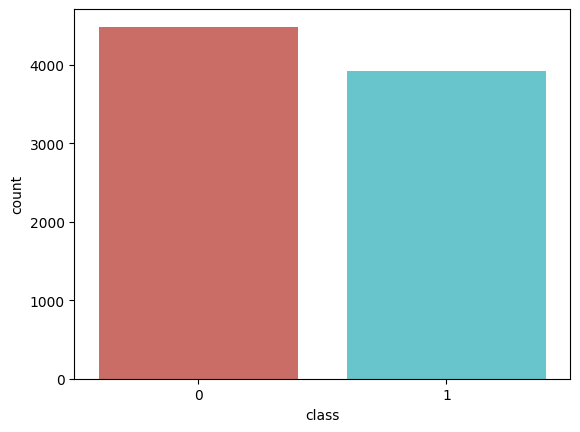

In [75]:
sns.countplot(x='class', data=pd.DataFrame(df['class']), palette='hls')
plt.show

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)